<a href="https://colab.research.google.com/github/sasurasa/soda_ep1/blob/main/soda_11_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

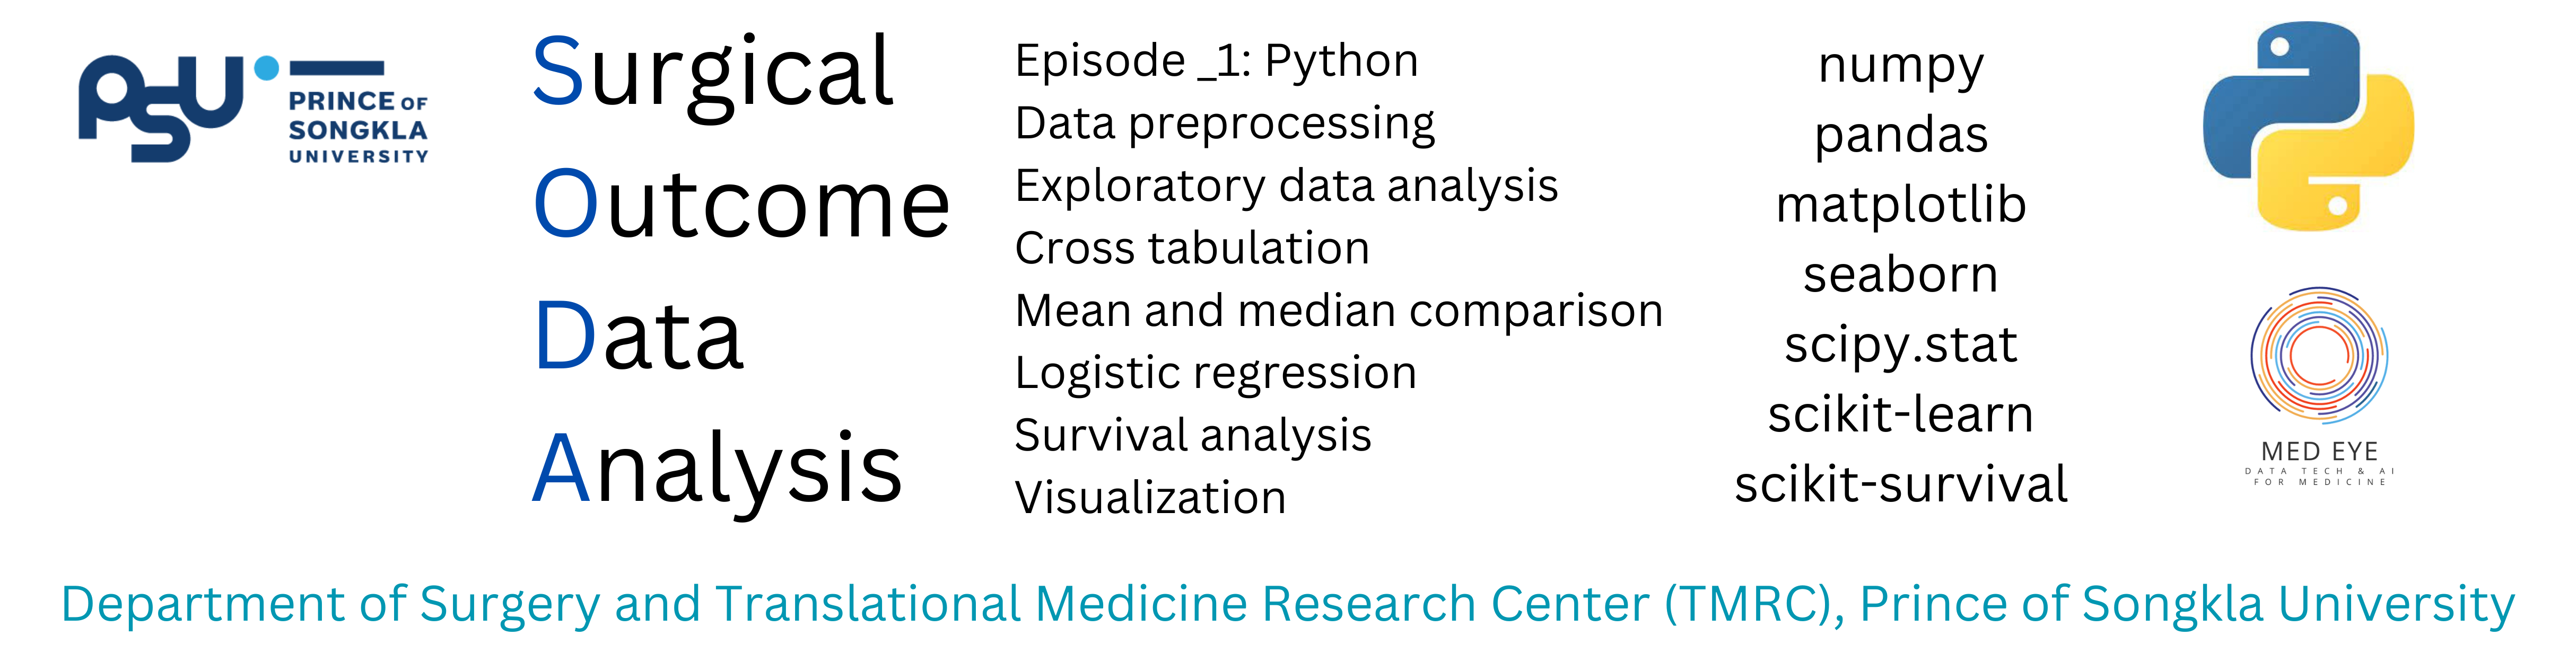

#Exploratory data analysis
- A process of reviewing and cleaning data to gain an insight and making a plan for further analysis.
- To see types, quality, distribution, and foresee opportunities to make the best out of the dataset.
- Tasks include uploading, cleaning (missing values, noise, outliers), transformation, and seeing crude relationships among variables.
- The dataset to be used in this session is 'psu_intuss.xlsx', which is stored in Microsoft Excel format. The study was a review of factors associating with success in pneumatic reduction in infantile intussusception.([see Boonsanit K. 2019](https://wjps.bmj.com/content/2/3/e000060))

In [ ]:
#Import basic packages from Colab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import data file (Excel)
def soap_sheetin(path, sheetname = 'Sheet1'):
	data = pd.read_excel(path, sheet_name=sheetname, engine='openpyxl')
	return data

In [ ]:
intuss = soap_sheetin('/content/psu_intuss.xlsx')
pd.set_option('display.max_columns', None) #Set full column display
print(intuss.head())

   id                  dob                  doa     sex  age  weight  durat  \
0   1  2558-11-10 00:00:00  2560-07-09 00:00:00  female   20    11.0   30.0   
1   2  2559-07-31 00:00:00  2560-06-14 00:00:00    male   11     7.8   32.0   
2   2  2559-07-31 00:00:00  2560-06-14 00:00:00    male   11     7.8   32.0   
3   3  2559-11-09 00:00:00  2560-10-02 00:00:00    male   11     8.0   20.0   
4   4  2559-12-14 00:00:00  2550-07-25 00:00:00    male    7     8.2   14.0   

   vomit  recb  abdd  fev  temp  mass  locl  usp  thic  asc  fluid  bldf  \
0      0     1     0    0  37.7     0     0    0     0    0      0     0   
1      1     1     0    0  37.0     1     0    0     0    0      0     0   
2      1     1     0    0  37.0     1     0    0     0    0      0     0   
3      1     0     1    0  36.7     0     0    1     0    0      1     0   
4      1     1     0    0  37.1     0     0    1     1    0      0     0   

   meth  score      wbc       plt    hb   hct   pmn   lym   bun    c

Exploring the dataset
- Number of columns
- Number of records (rows) and missing data in each column.
- Find outliers, noises, inconsistencies in each column
- Types and distribution patterns of data
- Test for normality of distribution

In [ ]:
intuss.info() #See the number of columns and number of rows in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          153 non-null    int64  
 1   dob         153 non-null    object 
 2   doa         153 non-null    object 
 3   sex         153 non-null    object 
 4   age         153 non-null    int64  
 5   weight      153 non-null    float64
 6   durat       149 non-null    float64
 7   vomit       153 non-null    int64  
 8   recb        153 non-null    int64  
 9   abdd        153 non-null    int64  
 10  fev         153 non-null    int64  
 11  temp        153 non-null    float64
 12  mass        153 non-null    int64  
 13  locl        153 non-null    int64  
 14  usp         153 non-null    int64  
 15  thic        153 non-null    int64  
 16  asc         153 non-null    int64  
 17  fluid       153 non-null    int64  
 18  bldf        153 non-null    int64  
 19  meth        153 non-null    i

In [ ]:
def soap_explore(data): #Display all column names, data types and dimension
	size = data.size
	dimension = data.shape
	variables = data.columns.values.tolist()
	print('===============================================================================================================')
	print('\nThe dataframe has',size, 'cells, with',dimension,'(row x column) dimension.\n')
	print('All the variables include;',variables,'\n')
	print('===============================================================================================================')
	print('Types and numbers of each variables are;')
	print(data.info())

In [ ]:
soap_explore(intuss)


The dataframe has 5355 cells, with (153, 35) (row x column) dimension.

All the variables include; ['id', 'dob', 'doa', 'sex', 'age', 'weight', 'durat', 'vomit', 'recb', 'abdd', 'fev', 'temp', 'mass', 'locl', 'usp', 'thic', 'asc', 'fluid', 'bldf', 'meth', 'score', 'wbc', 'plt', 'hb', 'hct', 'pmn', 'lym', 'bun', 'cr', 'sod', 'kcl', 'cl', 'hco', 'fail', 'underlying'] 

Types and numbers of each variables are;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          153 non-null    int64  
 1   dob         153 non-null    object 
 2   doa         153 non-null    object 
 3   sex         153 non-null    object 
 4   age         153 non-null    int64  
 5   weight      153 non-null    float64
 6   durat       149 non-null    float64
 7   vomit       153 non-null    int64  
 8   recb        153 non-null    int64  
 9   abdd        153 non-null   

In [ ]:
pd.crosstab(index = intuss['sex'], columns = intuss['underlying'], rownames=['sex'], colnames=['underlying'])

underlying,diabetes,dyslipidemia,hypertension,immune deficiency
sex,,,,
female,14,17,12,18
male,23,27,14,26
man,0,0,0,1
shemale,0,0,1,0


In [ ]:
def soap_describe(data):
	for var in data.columns.values.tolist():
		if data[var].nunique() > 2 and data[var].dtypes != 'O':
				print(var)
				des = (data[var].describe())
				print(des)
				plt.figure(figsize=(5, 2))
				sns.boxplot(x=data[var])
				plt.title(f'Boxplot of {var}')
				plt.xlabel(var)
				plt.show()
				print('-------------------------------------------------------------------------------------------------------------')


In [ ]:
soap_describe(intuss) #Showing description, aggregation, and Whisker boxplot of the continuous data (assumption n_unique > 2)

In [ ]:
def soap_unique_null(data):
    unique_values = {}
    null_count = data.isnull().sum().to_list()
    for col in data.columns:
        unique_values[col] = data[col].value_counts().shape[0]
    unique = pd.DataFrame(unique_values, index=['unique value count']).transpose()
    unique['number of null'] = null_count
    print(unique)

In [ ]:
soap_unique_null(intuss) #Counting null (missing values) in each column

In [ ]:
#Imputing the missing values
intuss.dropna(subset = ['durat'], axis = 0, inplace = True) #Delete rows with missing in a specified (list of) columns (subset)

In [ ]:
len(intuss)

149

In [ ]:
intuss.head() #See duplication in the index 1 and 2

,id,dob,doa,sex,age,weight,durat,vomit,recb,abdd,fev,temp,mass,locl,usp,thic,asc,fluid,bldf,meth,score,wbc,plt,hb,hct,pmn,lym,bun,cr,sod,kcl,cl,hco,fail,underlying
0,1,2558-11-10 00:00:00,2560-07-09 00:00:00,female,20,11.0,30.0,0,1,0,0,37.7,0,0,0,0,0,0,0,1,4,9800.0,320000.0,12.0,37.1,56.0,30.0,11.3,0.30,136.0,4.46,97.4,14.3,0,diabetes
1,2,2559-07-31 00:00:00,2560-06-14 00:00:00,male,11,7.8,32.0,1,1,0,0,37.0,1,0,0,0,0,0,0,0,7,13240.0,613000.0,10.3,31.8,62.0,30.0,8.4,0.16,136.0,4.66,96.1,17.5,1,dyslipidemia
2,2,2559-07-31 00:00:00,2560-06-14 00:00:00,male,11,7.8,32.0,1,1,0,0,37.0,1,0,0,0,0,0,0,0,7,13240.0,613000.0,10.3,31.8,62.0,30.0,8.4,0.16,136.0,4.66,96.1,17.5,1,dyslipidemia
3,3,2559-11-09 00:00:00,2560-10-02 00:00:00,male,11,8.0,20.0,1,0,1,0,36.7,0,0,1,0,0,1,0,1,7,12020.0,523000.0,9.2,27.3,57.0,37.0,8.6,0.20,140.0,4.80,101.6,17.8,0,dyslipidemia
4,4,2559-12-14 00:00:00,2550-07-25 00:00:00,male,7,8.2,14.0,1,1,0,0,37.1,0,0,1,1,0,0,0,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,dyslipidemia


In [ ]:
intuss['lym'] = intuss['lym'].fillna(intuss['lym'].median()) #Fill missing values in a specified column with aggregate values.

In [ ]:
intuss.isna().sum() #Notice that the number of missing value in the managed column(s) turns to 0.

In [ ]:
#Delete duplication
intuss = intuss.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

In [ ]:
len(intuss) #Length after deleting duplication

147

In [ ]:
#Correcting noises
intuss.loc[intuss['weight'] == 108, 'weight'] = 10.8

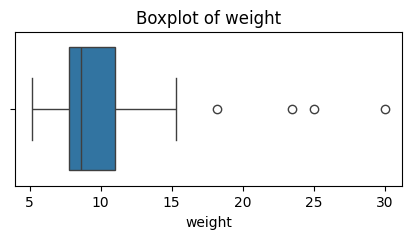

In [ ]:
plt.figure(figsize=(5, 2)) #Comparing the boxplot between the below and the above
sns.boxplot(x=intuss['weight'])
plt.title(f'Boxplot of weight')
plt.xlabel('weight')
plt.show()

In [ ]:
#Select rows with temp < 35.0
filtered_intuss = intuss[intuss['temp'] < 35.0]
filtered_intuss

,id,dob,doa,sex,age,weight,durat,vomit,recb,abdd,fev,temp,mass,locl,usp,thic,asc,fluid,bldf,meth,score,wbc,plt,hb,hct,pmn,lym,bun,cr,sod,kcl,cl,hco,fail
27,28,2550-07-14 00:00:00,2551-02-23 00:00:00,male,9,8.2,16,0,1,0,0,3.67,1,0,0,0,0,0,0,1,6,15400.0,575000.0,10.5,32.8,39.0,49.0,10.3,0.24,138.0,4.48,103.0,19.0,0


Practice
- Change the temperature ('temp') value in the 'intuss' data frame from 3.67 to 36.7.

In [ ]:
intuss.value_counts('sex')

sex
male       87
female     58
man         1
shemale     1
dtype: int64

In [ ]:
intuss.loc[intuss['sex'] == 'shemale', 'sex'] = 'male'

In [ ]:
#Remove a row by condition(s) in a column
intuss_filtered = intuss.loc[df['sex'] != 'man']

Practice
- Change 'man' to 'male'

In [ ]:
intuss.value_counts('sex')

In [ ]:
def soap_count_percent(data, col):
  abs_count = data[col].value_counts()
  rel_count = data[col].value_counts(normalize=True)*100
  count_tab = pd.DataFrame({'abs_count' : abs_count, 'percent' : rel_count})
  count_tab = count_tab.sort_index(ascending=True)
  count_tab.index.name = col
  print(count_tab)
  plt.figure(figsize=(5, 3))
  sns.barplot(x=col, y='percent', data=count_tab)
  plt.ylabel('Percentage')
  plt.title(f'Percentage of each value in {col}')
  plt.show()

        abs_count    percent
sex                         
female         61  40.397351
male           90  59.602649


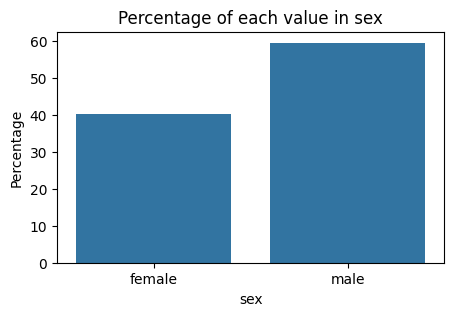

In [ ]:
soap_count_percent(intuss, 'sex')

In [ ]:
#To view value count and percents of all categorical data
def soap_batch_percent(data):
  for i in data.columns:
    if data[i].nunique() < 6:
      print('------------------------------------------------------------------')
      soap_count_percent(data, i)


In [ ]:
soap_batch_percent(intuss)

In [ ]:
from scipy.stats import shapiro

In [ ]:
def shapif(data):
    data_numeric = data.select_dtypes(exclude=['object'])

    d1 = {}
    for i in data_numeric.columns.values.tolist():
        data_numeric[i].astype('float64')
        x = data_numeric[i].dropna()
        s = shapiro(x)
        # Rounding each element of the tuple to 3 decimal places
        s_rounded = (round(s[0], 3), round(s[1], 3))
        d1[i] = s_rounded
    df1 = pd.DataFrame(d1.items(), columns=['variable', 'Shapiro-Wilk result'])
    print(df1)


def soaplore(data):
    num_col = []
    for i in data.columns:
      if data[i].nunique() > 5:
        num_col.append(i)
    data = data[num_col]
    shapif(data)
    print('\n')


In [ ]:
soaplore(intuss)
#Interpretation If p-value < 0.05, we have sufficient data to say that the sample does not come from a normal distribution.

   variable Shapiro-Wilk result
0        id        (0.955, 0.0)
1       age        (0.673, 0.0)
2    weight        (0.766, 0.0)
3     durat        (0.897, 0.0)
4      temp        (0.216, 0.0)
5     score      (0.983, 0.062)
6       wbc        (0.955, 0.0)
7       plt        (0.928, 0.0)
8        hb      (0.963, 0.002)
9       hct       (0.98, 0.049)
10      pmn      (0.976, 0.021)
11      lym      (0.981, 0.076)
12      bun        (0.912, 0.0)
13       cr        (0.844, 0.0)
14      sod      (0.962, 0.002)
15      kcl      (0.982, 0.113)
16       cl        (0.416, 0.0)
17      hco      (0.993, 0.825)




In [ ]:
def soap_batch_histo(data):
  data_numeric = data.select_dtypes(exclude=['object'])
  filtered_columns = data.columns[data.apply(pd.Series.nunique) > 5]
  filtered_columns = filtered_columns[2:]
  filtered_data = data[filtered_columns]
  filtered_data.hist(figsize=(25, 20), bins=40, layout=(10, 4))
  plt.tight_layout()
  plt.show()

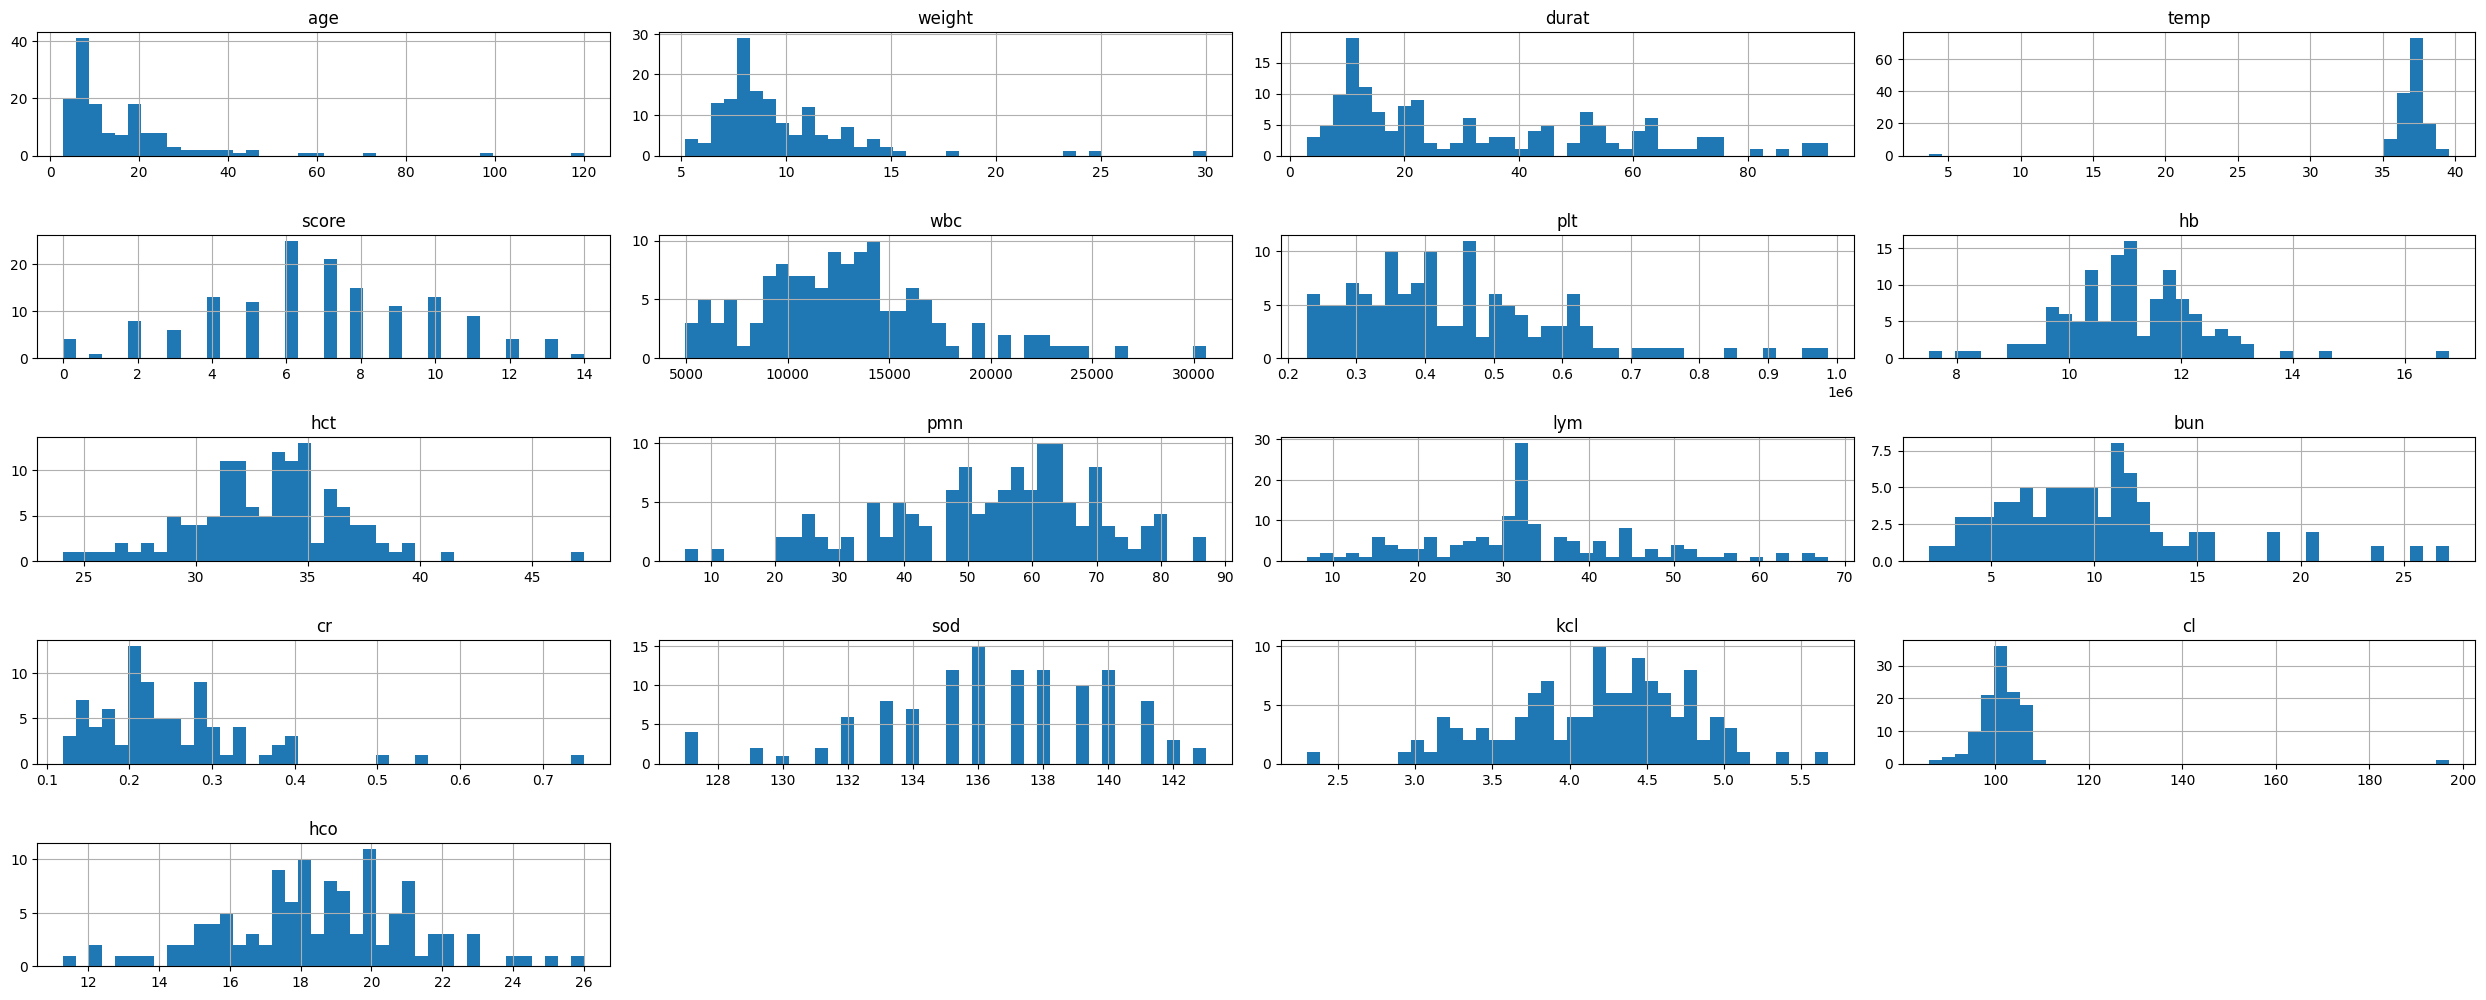

In [ ]:
soap_batch_histo(intuss) #Display histograms for continuous variables

In [ ]:
def create_plot_pivot(data, x_column, target):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data.groupby([x_column, target]).size() \
    .reset_index().pivot(columns=target, index=x_column, values=0)
    return _df_plot


In [ ]:
def soap_bi_plot(data, target):
    bi_cols = []
    for col in data.columns:
      if col == target:
        continue
      if data[col].nunique() == 2:
        bi_cols.append(col)

    fig, ax = plt.subplots(6, 4, figsize=(20,20))
    axe = ax.ravel()
    c = len(bi_cols)

    for i in range(c):
      create_plot_pivot(data, bi_cols[i], target).plot(kind='bar',stacked=True, ax=axe[i])
      axe[i].set_xlabel(bi_cols[i])

    fig.show()

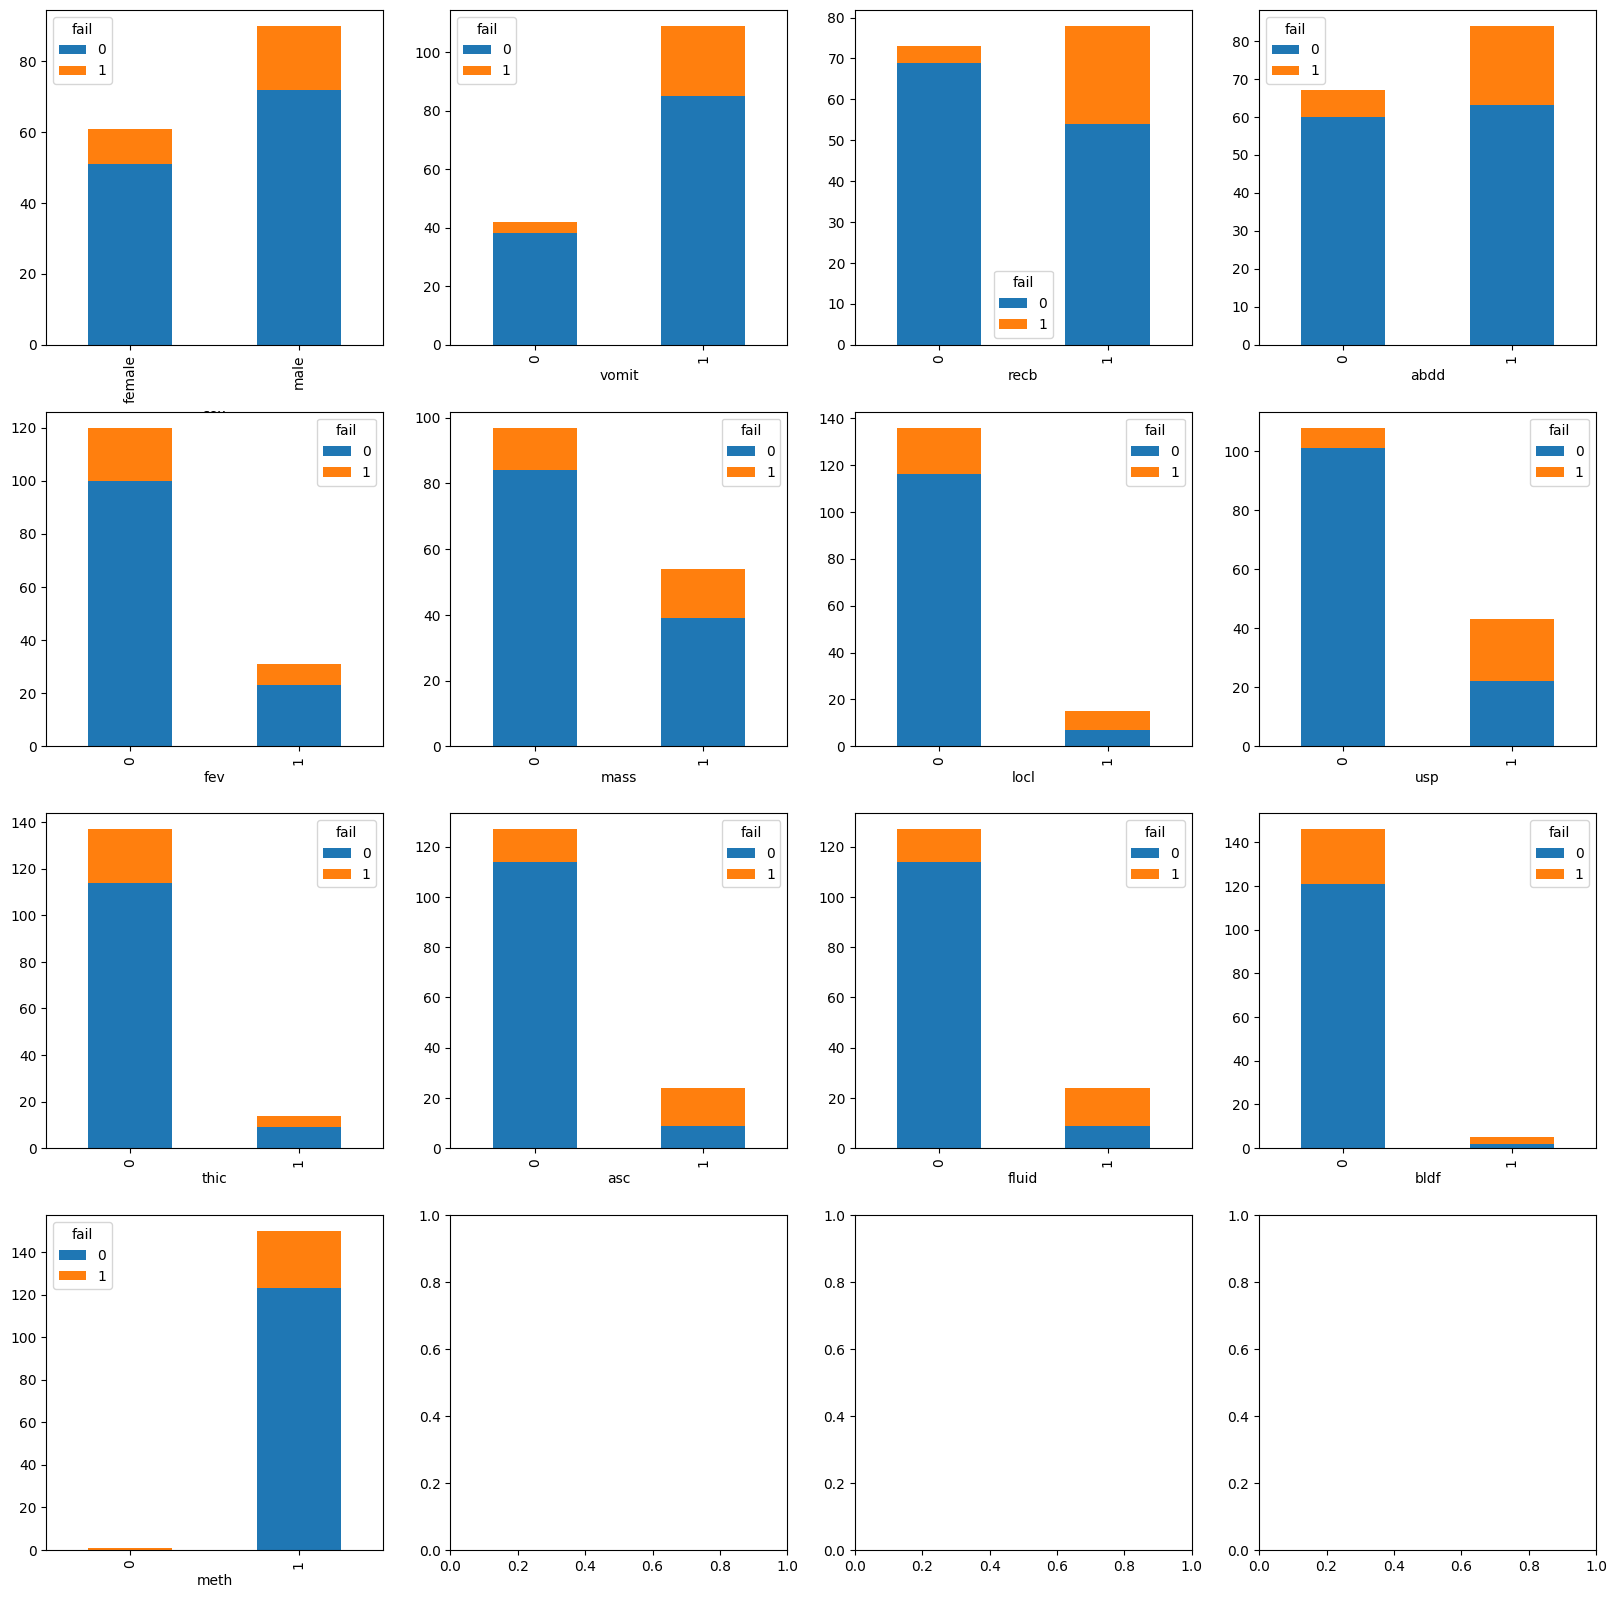

In [ ]:
soap_bi_plot(intuss, 'fail')

In [ ]:
def soap_line_plot(data, target):
    num_cols = []
    for col in data.columns:
      if data[col].dtype == 'O':
        continue
      if data[col].nunique() > 5:
        num_cols.append(col)

    fig, ax = plt.subplots(6, 4, figsize=(25,25))
    axe = ax.ravel()
    c = len(num_cols)

    for i in range(c):
      create_plot_pivot(intuss, num_cols[i], target).plot(kind='line', ax=axe[i])
      axe[i].set_xlabel(num_cols[i])

    fig.show()

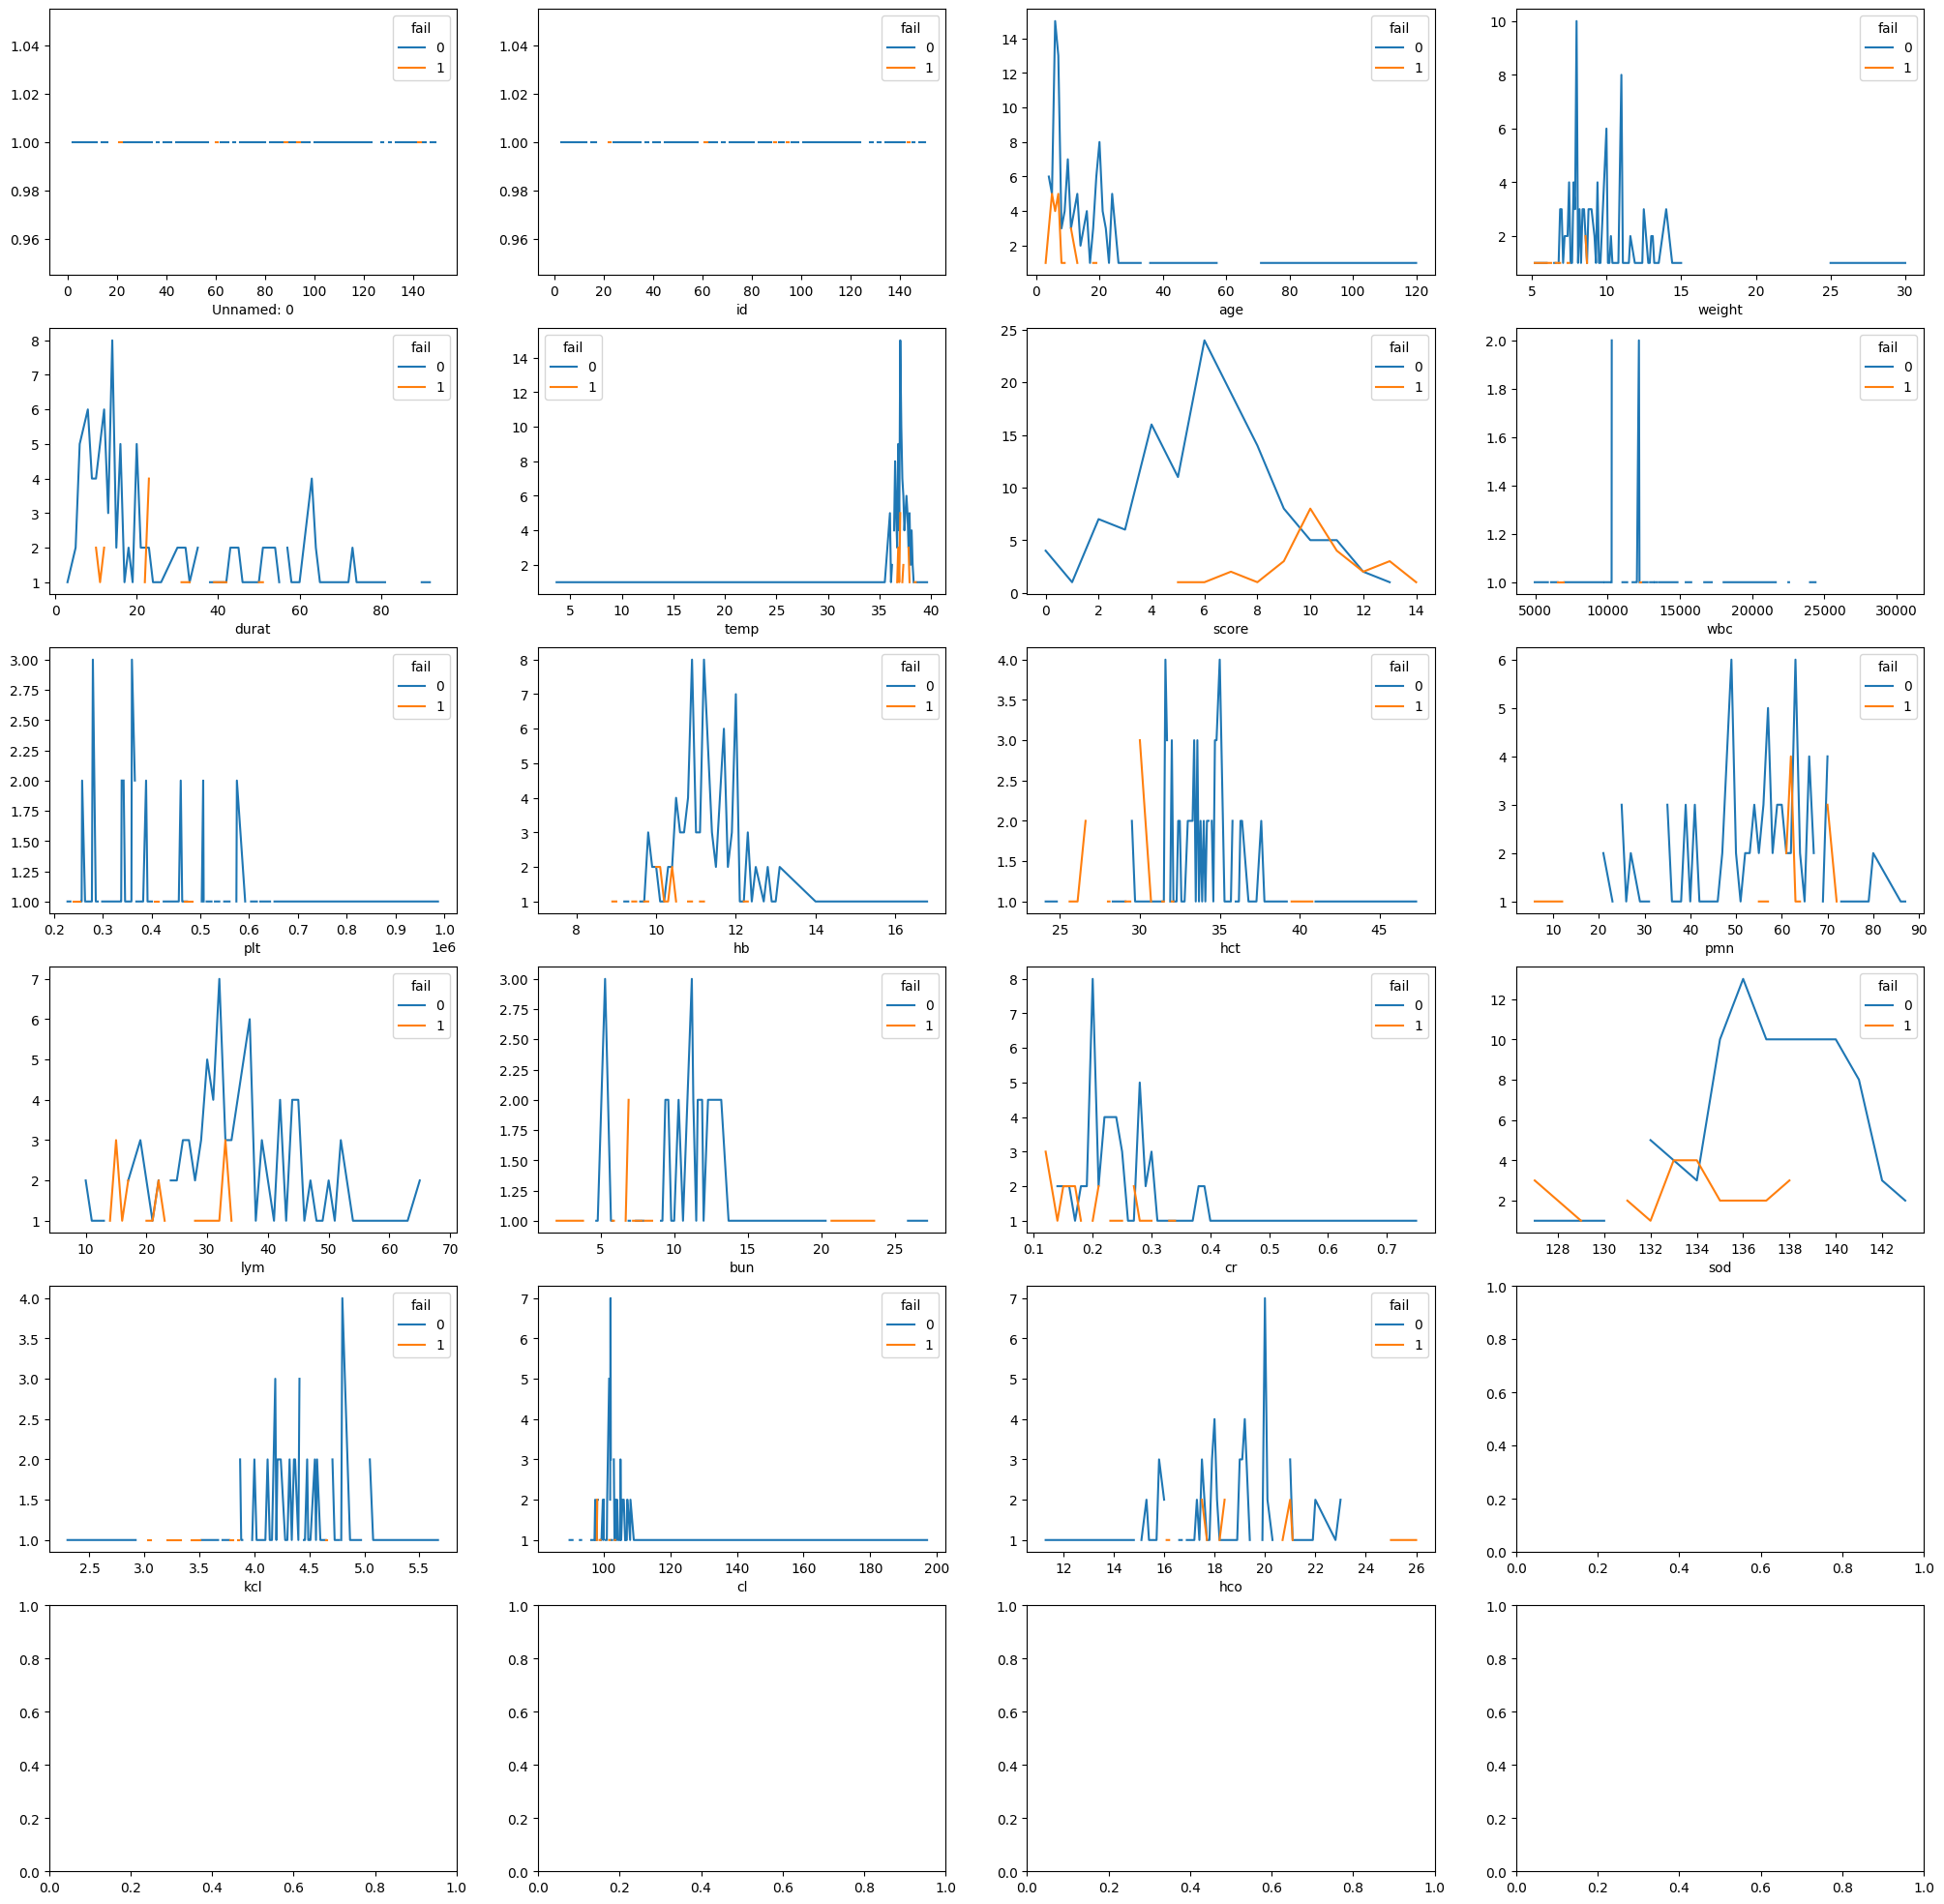

In [ ]:
soap_line_plot(intuss, 'fail')

#Data transformation

In [ ]:
def soap_onehot(data, col):
  from sklearn.preprocessing import OneHotEncoder
  encoder = OneHotEncoder(sparse=False)
  onehot_encoded_data = encoder.fit_transform(data[[col]])
  onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns=encoder.get_feature_names_out([col])).astype(int)
  result = pd.concat([data, onehot_encoded_df], axis=1)
  return result



In [ ]:
intuss_2 = soap_onehot(intuss, 'underlying')
intuss_2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,id,dob,doa,sex,age,weight,durat,vomit,recb,abdd,fev,temp,mass,locl,usp,thic,asc,fluid,bldf,meth,score,wbc,plt,hb,hct,pmn,lym,bun,cr,sod,kcl,cl,hco,fail,underlying,underlying_diabetes,underlying_dyslipidemia,underlying_hypertension,underlying_immune deficiency
0,0,1,2558-11-10 00:00:00,2560-07-09 00:00:00,female,20,11.0,30,0,1,0,0,37.7,0,0,0,0,0,0,0,1,4,9800.0,320000.0,12.0,37.1,56.0,30.0,11.3,0.30,136.0,4.46,97.4,14.3,0,diabetes,1,0,0,0
1,1,2,2559-07-31 00:00:00,2560-06-14 00:00:00,male,11,7.8,32,1,1,0,0,37.0,1,0,0,0,0,0,0,0,7,13240.0,613000.0,10.3,31.8,62.0,30.0,8.4,0.16,136.0,4.66,96.1,17.5,1,dyslipidemia,0,1,0,0
2,2,3,2559-11-09 00:00:00,2560-10-02 00:00:00,male,11,8.0,20,1,0,1,0,36.7,0,0,1,0,0,1,0,1,7,12020.0,523000.0,9.2,27.3,57.0,37.0,8.6,0.20,140.0,4.80,101.6,17.8,0,dyslipidemia,0,1,0,0
3,3,4,2559-12-14 00:00:00,2550-07-25 00:00:00,male,7,8.2,14,1,1,0,0,37.1,0,0,1,1,0,0,0,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,dyslipidemia,0,1,0,0
4,4,5,2557-08-20 00:00:00,2559-08-16 00:00:00,male,24,13.0,10,1,0,0,0,36.4,0,0,0,0,0,0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,hypertension,0,0,1,0


In [ ]:
soap_count_percent(intuss_2, 'underlying_diabetes')

# To construct a new binary variable from a continuous variable

In [2]:
#Change continuous variable to binary
def soap_genbi(data, var, cutoff):
  var_gr = []
  for i in data[var]:
    if i < cutoff:
      var_gr.append(0)
    if i >= cutoff:
      var_gr.append(1)
  data[f'{var}_{cutoff}'] = var_gr
  data.groupby(f'{var}_{cutoff}').count()

#Crude correlation screening

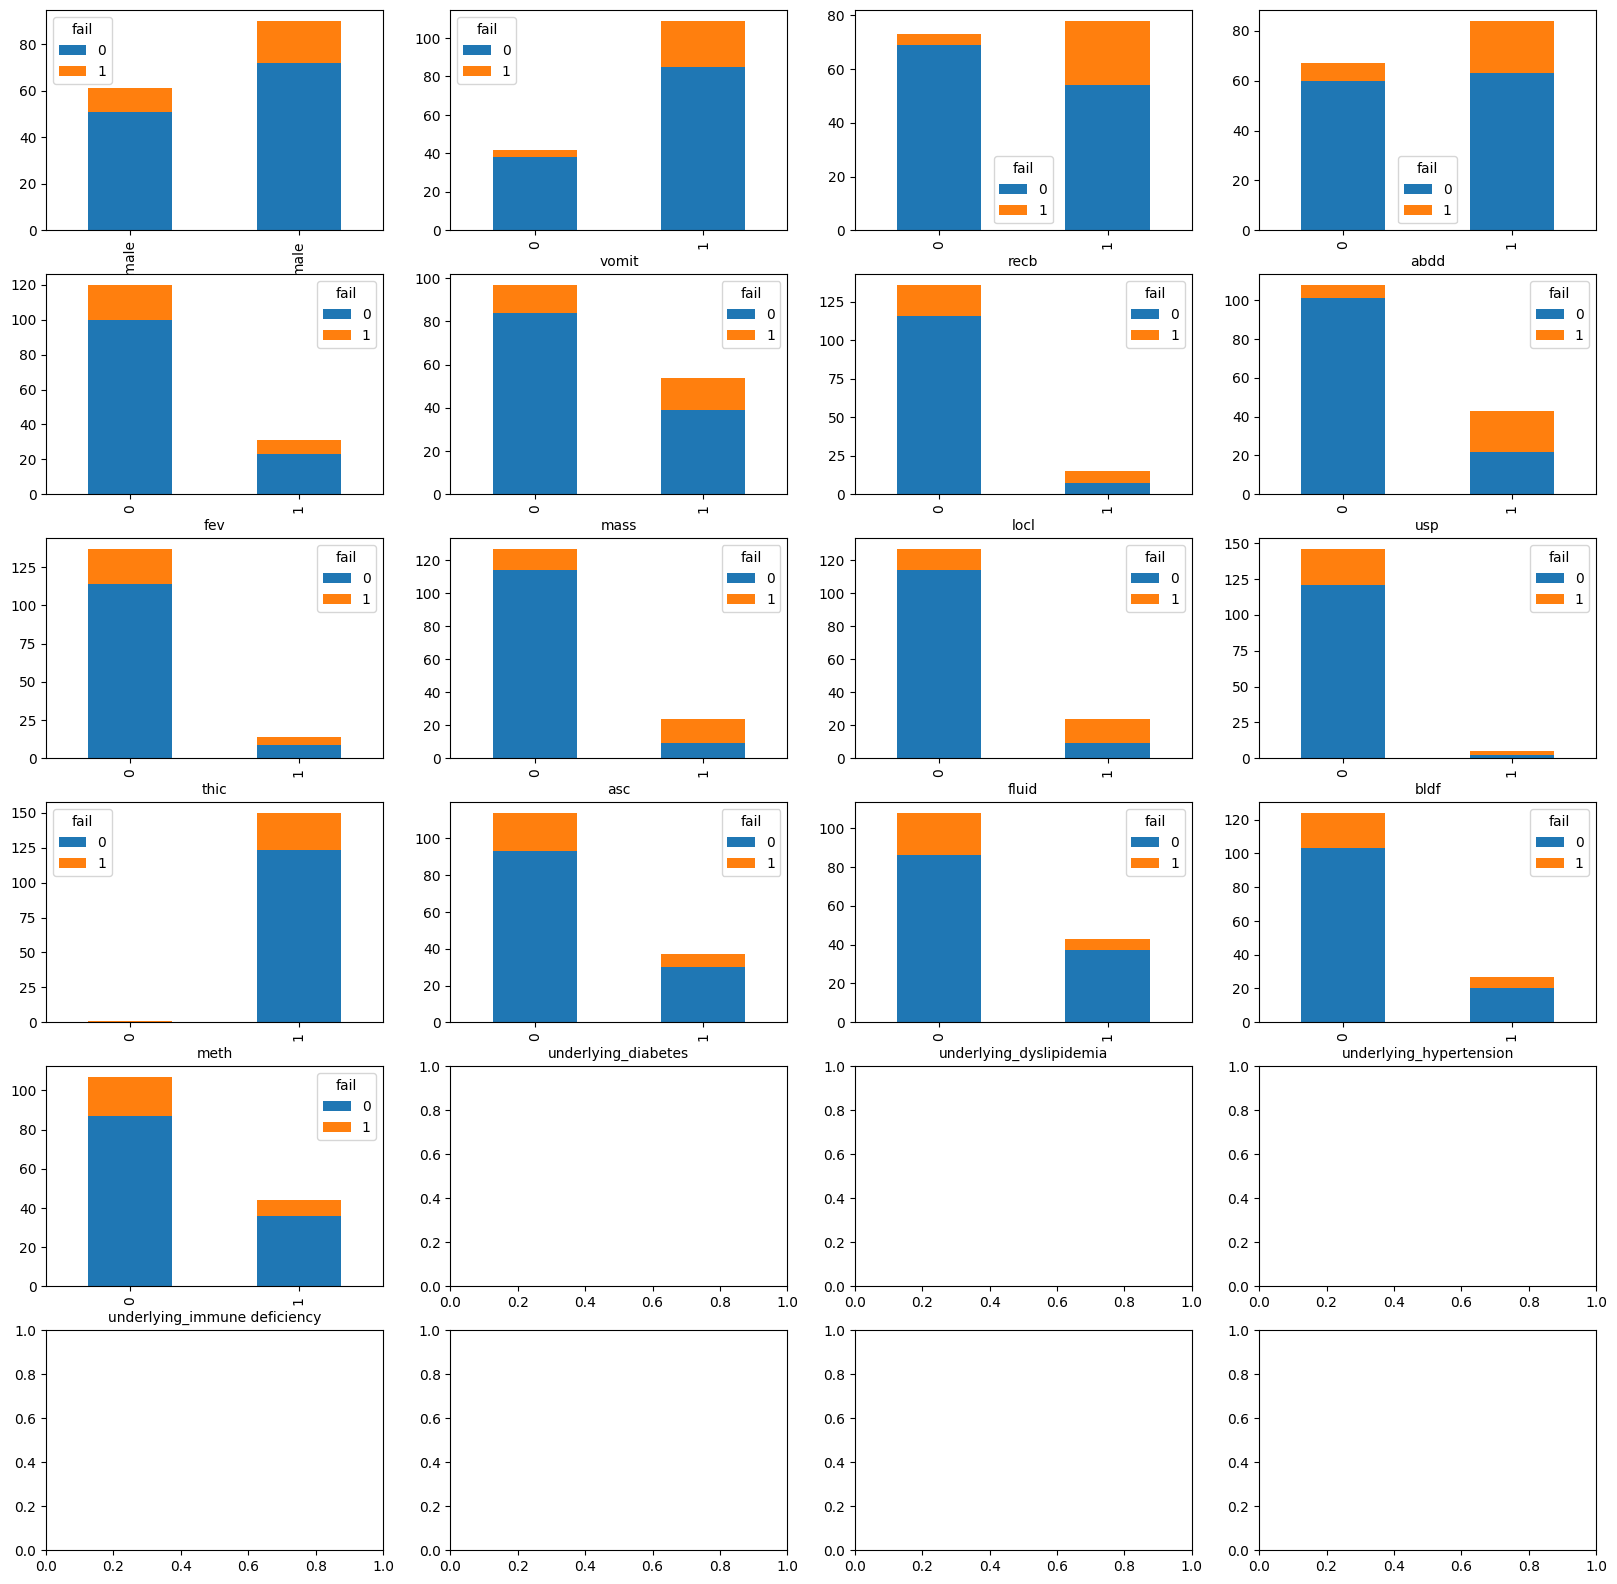

In [ ]:
soap_bi_plot(intuss_2, 'fail')

In [ ]:
def soap_target_corr(data, target):
  data.drop(target, axis=1).corrwith(data[target]).plot(kind='bar', grid=True, figsize=(20, 8) , title="Correlation with"+target, color="Purple")

<ipython-input-130-ba20842faf36>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.drop(target, axis=1).corrwith(data[target]).plot(kind='bar', grid=True, figsize=(20, 8) , title="Correlation with"+target, color="Purple")


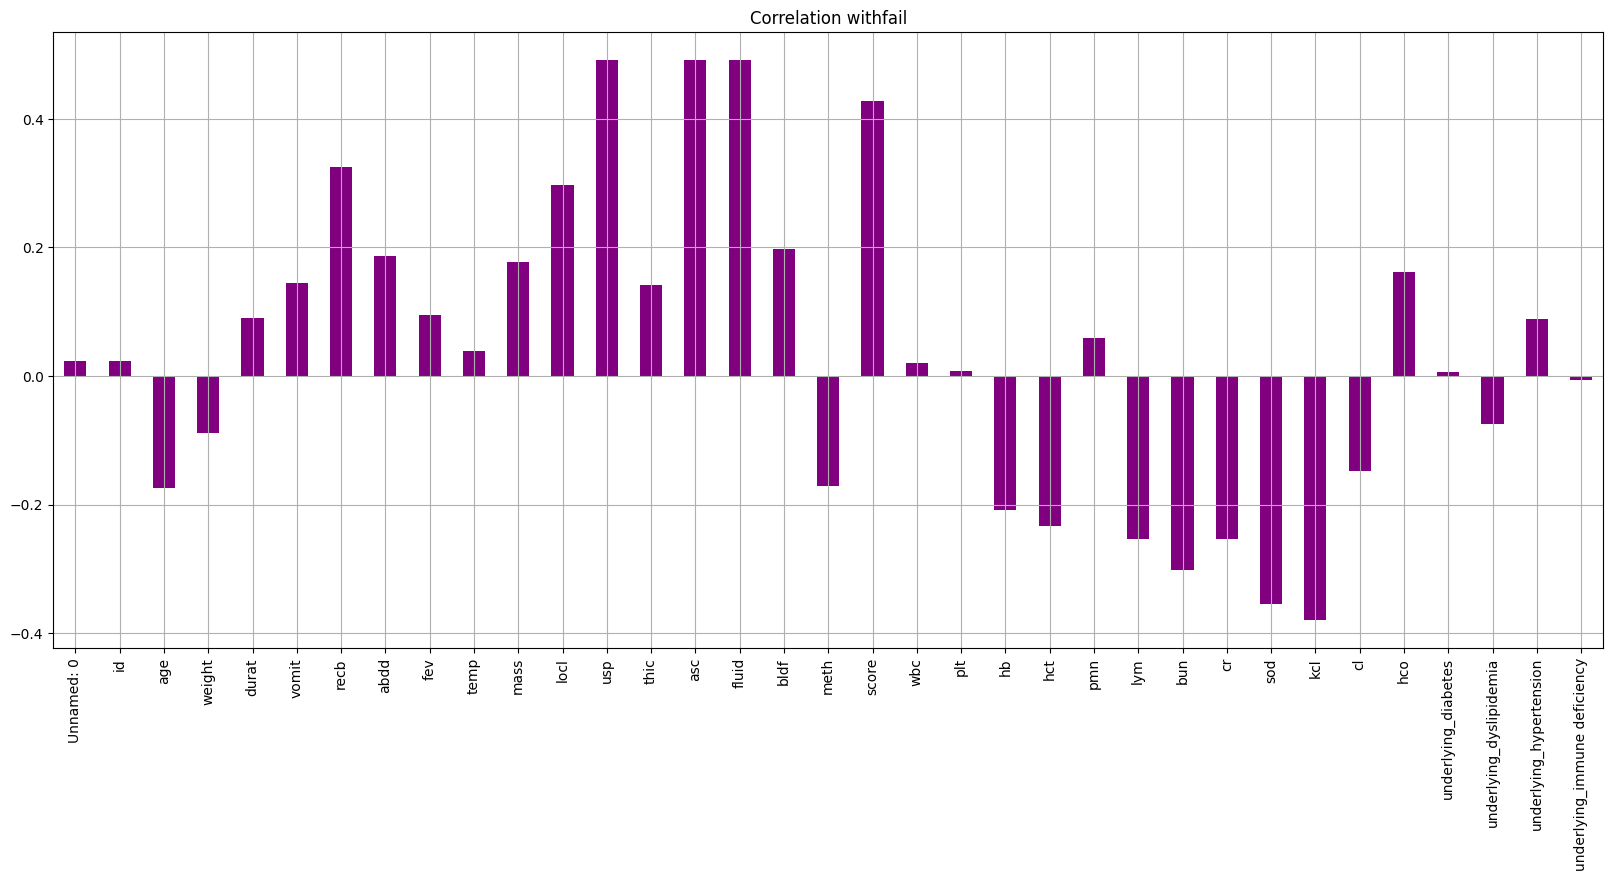

In [ ]:
soap_target_corr(intuss_2, 'fail')

In [ ]:
def soap_heatmap_corr(data):
  bi_cols = []
  for col in data.columns:
    if data[col].nunique() == 2:
      bi_cols.append(col)

  corr = data[bi_cols].corr()

  plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
  sns.heatmap(corr,
              xticklabels=corr.columns,
              yticklabels=corr.columns,
              annot=True,      # Annotate each cell with the numeric value
              cmap='coolwarm', # Color map
              linewidths=.5)   # Line widths between cells

  plt.title('Heatmap of Correlation Among Attributes')
  plt.show()


<ipython-input-138-84478da17248>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data[bi_cols].corr()


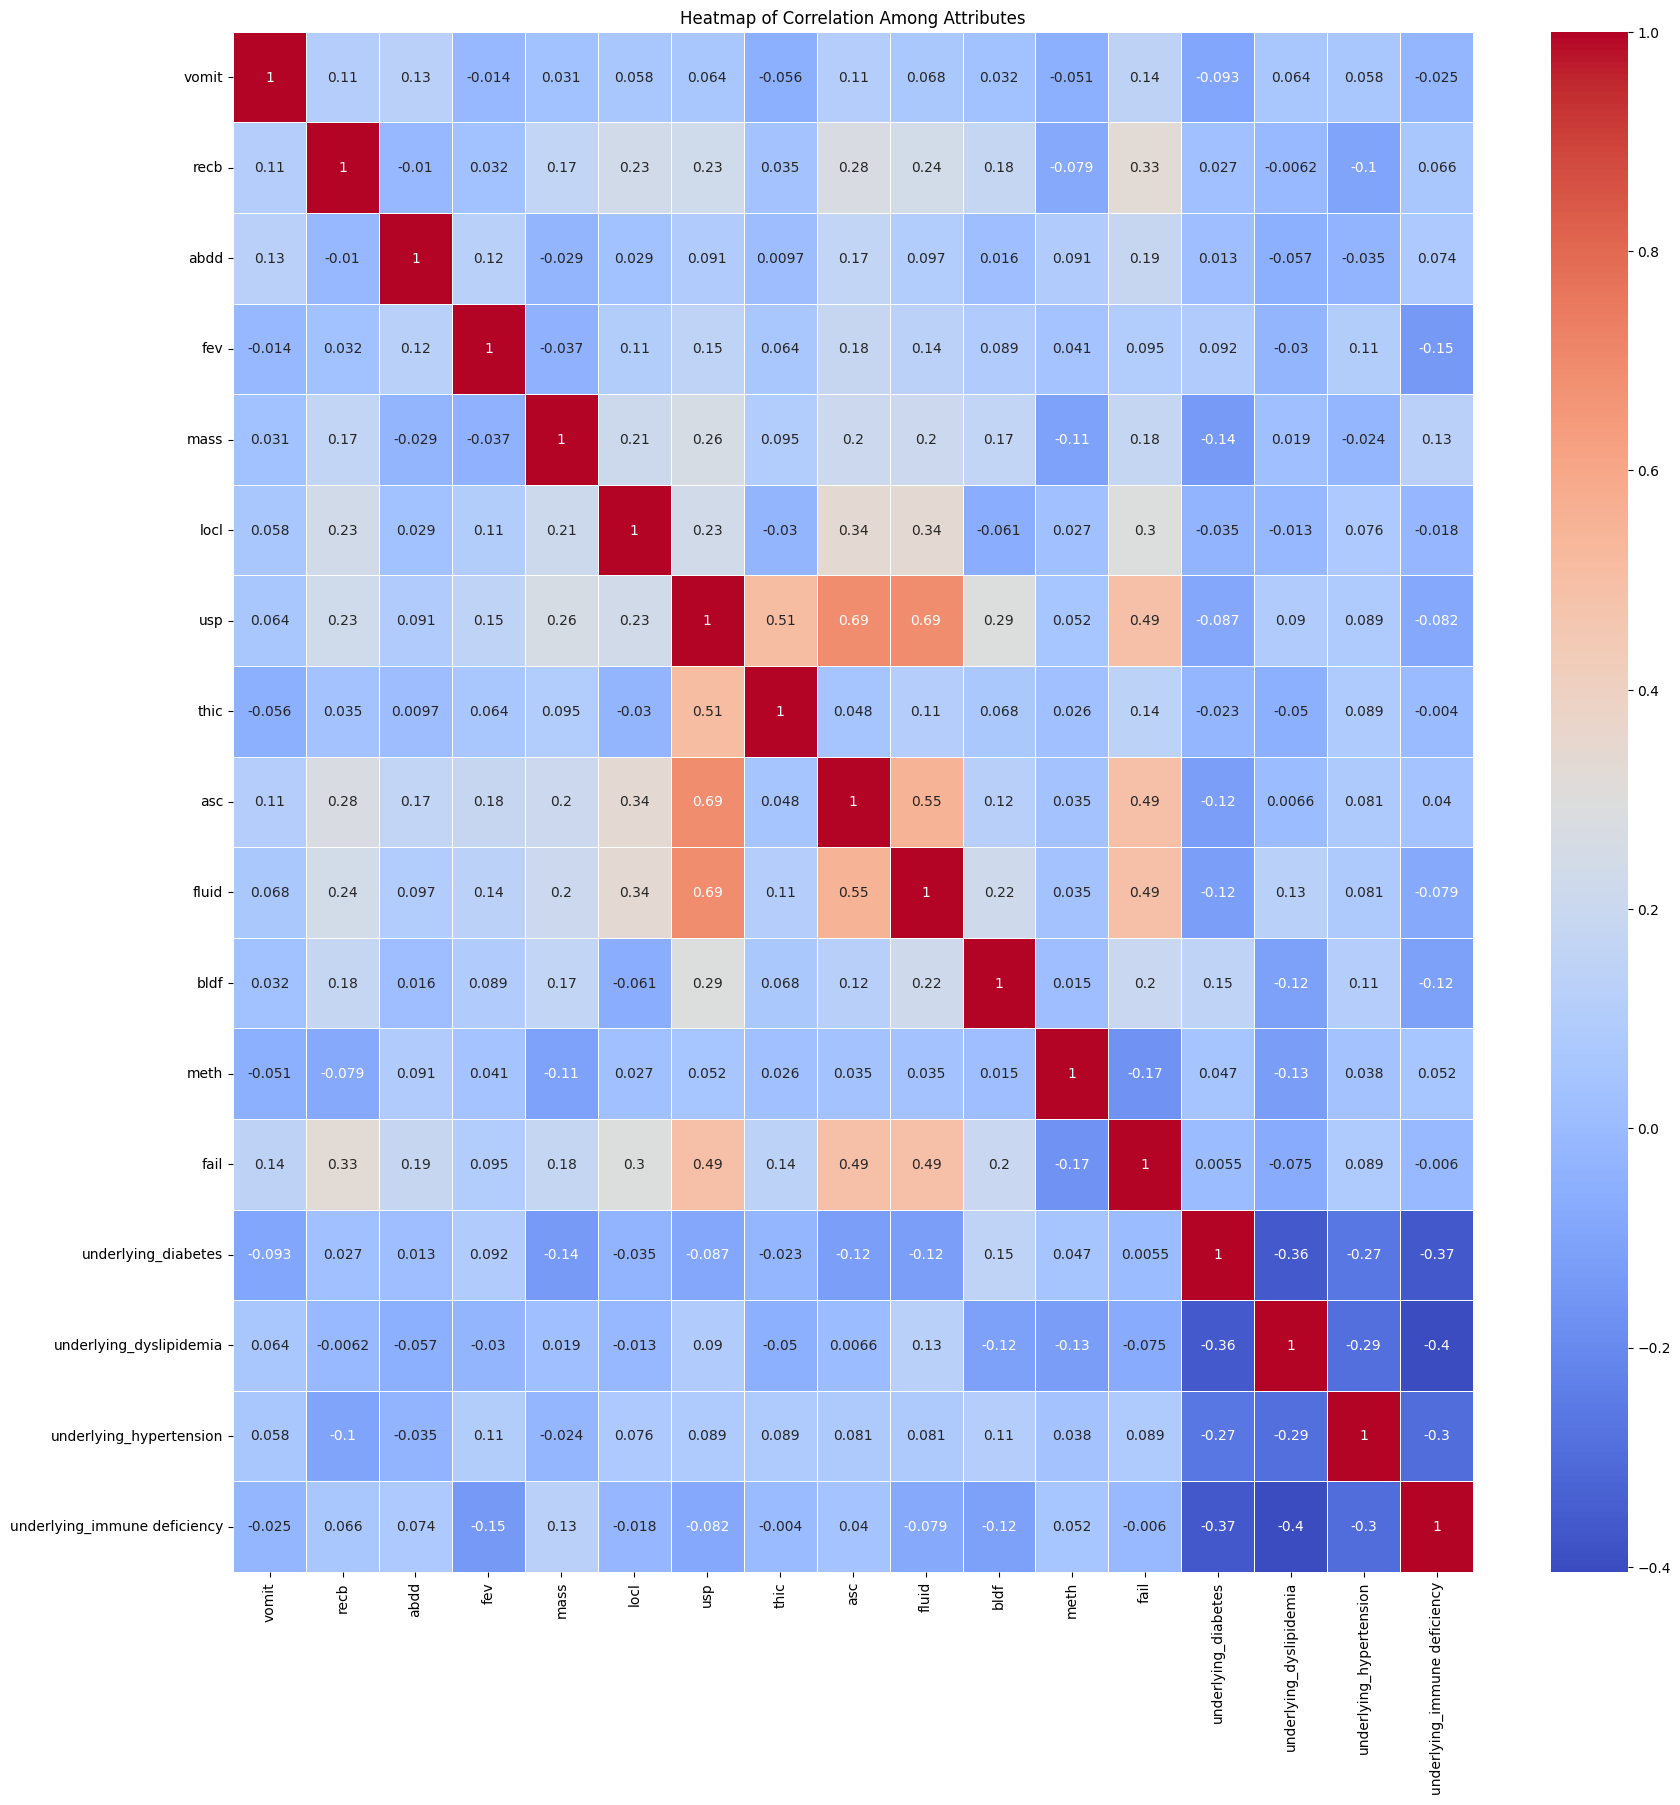

In [ ]:
soap_heatmap_corr(intuss_2)